# Title : Thyroid_Detection

;
; Thyroid disease records supplied by the Garavan Institute and J. Ross
; Quinlan, New South Wales Institute, Syndney, Australia.
;
; 1987.
;

This directory contains the latest version of an archive of thyroid diagnoses
obtained from the Garvan Institute, consisting of 9172 records from 1984 to
early 1987.  Each record looks like

	(29 attribute values), diagnoses [record identification]

The attributes are given in order and separated by commas.  Unknown attribute
values are indicated by question marks.  The attributes are

	Attribute Name			Possible Values
	--------------			---------------
	age:				continuous.
	sex:				M, F.
	on thyroxine:			f, t.
	query on thyroxine:		f, t.
	on antithyroid medication:	f, t.
	sick:				f, t.
	pregnant:			f, t.
	thyroid surgery:		f, t.
	I131 treatment:			f, t.
	query hypothyroid:		f, t.
	query hyperthyroid:		f, t.
	lithium:			f, t.
	goitre:				f, t.
	tumor:				f, t.
	hypopituitary:			f, t.
	psych:				f, t.
	TSH measured:			f, t.
	TSH:				continuous.
	T3 measured:			f, t.
	T3:				continuous.
	TT4 measured:			f, t.
	TT4:				continuous.
	T4U measured:			f, t.
	T4U:				continuous.
	FTI measured:			f, t.
	FTI:				continuous.
	TBG measured:			f, t.
	TBG:				continuous.
	referral source:		WEST, STMW, SVHC, SVI, SVHD, other.

The diagnosis consists of a string of letters indicating diagnosed conditions.
A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
conditions are divided into groups where each group corresponds to a class of
comments.

		Letter	Diagnosis
		------	---------

	hyperthyroid conditions:

		A	hyperthyroid
		B	T3 toxic
		C	toxic goitre
		D	secondary toxic

	hypothyroid conditions:

		E	hypothyroid
		F	primary hypothyroid
		G	compensated hypothyroid
		H	secondary hypothyroid

	binding protein:

		I	increased binding protein
		J	decreased binding protein

	general health:

		K	concurrent non-thyroidal illness

	replacement therapy:

		L	consistent with replacement therapy
		M	underreplaced
		N	overreplaced

	antithyroid treatment:

		O	antithyroid drugs
		P	I131 treatment
		Q	surgery

	miscellaneous:

		R	discordant assay results
		S	elevated TBG
		T	elevated thyroid hormones

In experiments with an earlier version of this archive, decision trees were
derived for the most frequent classes of comments, namely

	hyperthyroid conditions (A, B, C, D)
	hypothyroid conditions (E, F, G, H)
	binding protein (I, J)
	general health (K)
	replacement therapy (L, M, N)
	discordant results (R)


# import dataset and required libraries

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv(r"C:\Users\admin\Desktop\Projects\M.Sc Projrct\thyroid0387_d.data");df

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


##### Here column variables [Attribute Name] are not in df so have to add column varibles.

In [8]:
feature_cols = ["age",
                "sex",
                "on_thyroxine",
                "query_on_thyroxine",
                "on_antithyroid_medication",
                "sick",
                "pregnant",
                "thyroid_surgery",
                "I131_treatment",
                "query_hypothyroid",
                "query_hyperthyroid",
                "lithium",
                "goitre",
                "tumor",
                "hypopituitary",
                "psych",
                "TSH measured",
                "TSH",
                "T3_measured",
                "T3",
                "TT4_measured",
                "TT4",
                "T4U_measured",
                "T4U",
                "FTI_measured",
                "FTI",
                "TBG_measured",
                "TBG",
                "referral source",
               "target"]

In [9]:
df.columns = feature_cols;df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral source,target
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [10]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral source,target
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]


# Exploratory Data Analysis

###### Droping "referral source" becouse we do not require that Attribute

In [11]:
df.drop("referral source",axis=1,inplace=True);df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,?,t,64,t,0.83,t,77,f,?,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,?,t,91,t,0.92,t,99,f,?,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,?,t,113,t,1.27,t,89,f,?,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,?,t,75,t,0.85,t,88,f,?,-[870119027]


In [12]:
target = df.target
create = target.str.split("[^a-zA-Z]+", expand=True)

In [13]:
target = create[0].replace({"":'Z'})

In [14]:
len(target.unique())

30

In [15]:
df['target']=target

In [16]:
df.target.value_counts()

Z      6770
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
C        18
MK       16
Q        14
O        14
KJ       11
GI       10
D         9
H         8
FK        6
P         5
MI        2
LJ        1
GKJ       1
OI        1
E         1
Name: target, dtype: int64

##### Now we want to impute the null values but this case the null values are marked as in '?' so we can do some tricks

In [17]:
df = df.replace('?',np.nan);df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,NaN,f,NaN,f,NaN,Z
1,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,11,Z
2,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26,Z
3,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,36,S
4,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,NaN,t,64,t,0.83,t,77,f,NaN,Z
9167,22,M,f,f,f,f,f,f,f,f,...,NaN,t,91,t,0.92,t,99,f,NaN,Z
9168,69,M,f,f,f,f,f,f,f,f,...,NaN,t,113,t,1.27,t,89,f,NaN,I
9169,47,F,f,f,f,f,f,f,f,f,...,NaN,t,75,t,0.85,t,88,f,NaN,Z


In [18]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3_measured                     0
T3                           2603
TT4_measured                    0
TT4                           441
T4U_measured                    0
T4U                           808
FTI_measured                    0
FTI                           801
TBG_measured                    0
TBG                          8822
target                          0
dtype: int64

##### here we can see the TBG has more null observations it will tremendously occur problem so we can remove and some of the other feautre rows which is not useful.

In [19]:
df.drop(['TBG_measured','TBG','T3_measured','TSH measured','TT4_measured','T4U_measured','FTI_measured'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9171 non-null   int64 
 1   sex                        8864 non-null   object
 2   on_thyroxine               9171 non-null   object
 3   query_on_thyroxine         9171 non-null   object
 4   on_antithyroid_medication  9171 non-null   object
 5   sick                       9171 non-null   object
 6   pregnant                   9171 non-null   object
 7   thyroid_surgery            9171 non-null   object
 8   I131_treatment             9171 non-null   object
 9   query_hypothyroid          9171 non-null   object
 10  query_hyperthyroid         9171 non-null   object
 11  lithium                    9171 non-null   object
 12  goitre                     9171 non-null   object
 13  tumor                      9171 non-null   object
 14  hypopitu

In [21]:
import pandas as pd


column_to_convert = 'age'
df[column_to_convert] = pd.to_numeric(df[column_to_convert], errors='coerce')
column_to_convert = 'TSH'
df[column_to_convert] = pd.to_numeric(df[column_to_convert], errors='coerce')
column_to_convert = 'T3'
df[column_to_convert] = pd.to_numeric(df[column_to_convert], errors='coerce')
column_to_convert = 'TT4'
df[column_to_convert] = pd.to_numeric(df[column_to_convert], errors='coerce')
column_to_convert = 'T4U'
df[column_to_convert] = pd.to_numeric(df[column_to_convert], errors='coerce')
column_to_convert = 'FTI'
df[column_to_convert] = pd.to_numeric(df[column_to_convert], errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9171 non-null   int64  
 1   sex                        8864 non-null   object 
 2   on_thyroxine               9171 non-null   object 
 3   query_on_thyroxine         9171 non-null   object 
 4   on_antithyroid_medication  9171 non-null   object 
 5   sick                       9171 non-null   object 
 6   pregnant                   9171 non-null   object 
 7   thyroid_surgery            9171 non-null   object 
 8   I131_treatment             9171 non-null   object 
 9   query_hypothyroid          9171 non-null   object 
 10  query_hyperthyroid         9171 non-null   object 
 11  lithium                    9171 non-null   object 
 12  goitre                     9171 non-null   object 
 13  tumor                      9171 non-null   objec

In [23]:
df.corr()

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.003980,0.004523,0.004122,-0.002045,0.004108
TSH,-0.003980,1.000000,-0.159372,-0.275915,0.075857,-0.275468
T3,0.004523,-0.159372,1.000000,0.550381,0.345649,0.370423
TT4,0.004122,-0.275915,0.550381,1.000000,0.368754,0.751199
T4U,-0.002045,0.075857,0.345649,0.368754,1.000000,-0.238970
FTI,0.004108,-0.275468,0.370423,0.751199,-0.238970,1.000000


<AxesSubplot:>

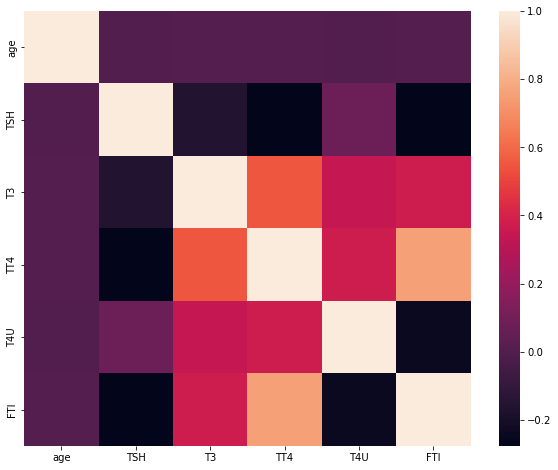

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [25]:
cols= [col for col in df.columns if df[col].dtype=='O'];cols

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'target']

In [26]:
len(cols)

16

In [27]:
for i in cols:
    try:
        df[i] = le.fit_transform(df[i])
    except:
        continue

In [28]:
len(df.columns)

22

In [29]:
# now we can see their is correlation in some features
for a in range(len(df.columns)):
  for b in range(a):    
                            # for b in range(0) will not return anything so it will start when a=1 bcz range(num) se ek pehle tak ka number hi loop me jayega
      if((df.corr().iloc[a,b]) >= 0.7):  
                            # so it will not go till diagonal values of dataset
          print(df.corr().columns[b])
 #from this we can say EKCH AAHE JYACHE corr > 0.7 peksha jast aahe.

TT4


IndexError: single positional indexer is out-of-bounds

In [ ]:
df.hist(bins=20,figsize=(20,20));
#bins=25 mhnje te ha bar aahe bagha blue colour mde tyachi width.
# bins indicates the width of bar shown in hist plot

In [30]:
# So here also FTI and TT4 are resembling the same type of histogram so we will drop 

In [31]:
# so TT4 has high correlation among all we can remove

df.drop('TT4',axis=1,inplace=True)

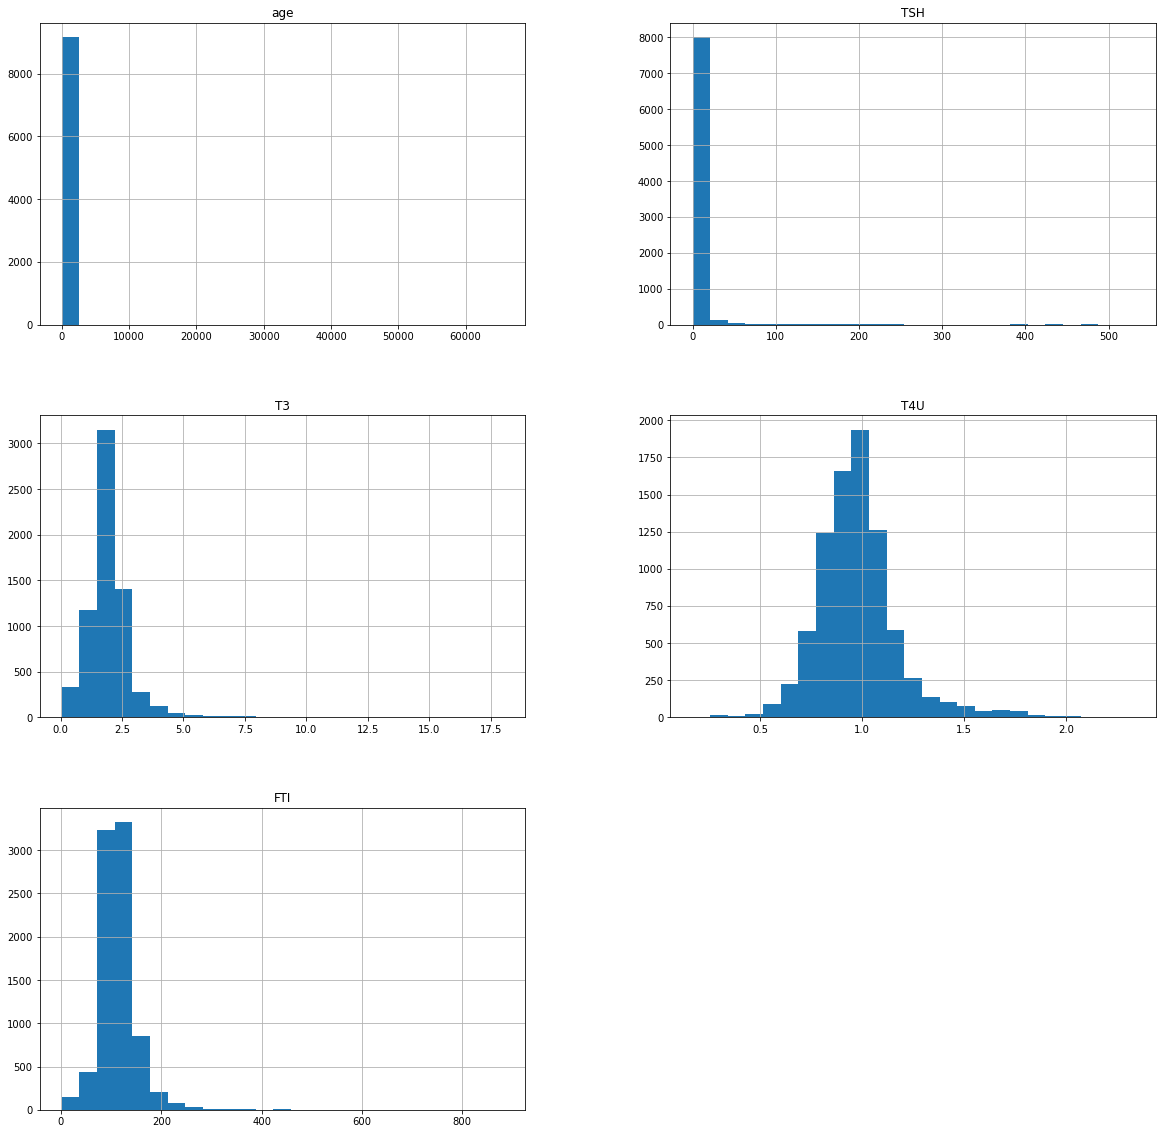

In [32]:
df.hist(bins=25,figsize=(20,20));


CHECKING FOR OUTLIERS

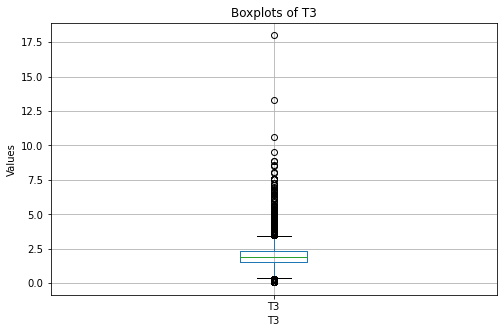

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Create boxplots for each column
plt.figure(figsize=(8,5))
df.boxplot("T3")

# Add labels and title
plt.xlabel('T3')
plt.ylabel('Values')
plt.title('Boxplots of T3')

# Show the plot
plt.show()

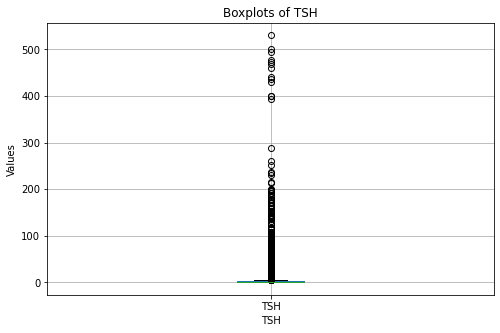

In [34]:

import pandas as pd
import matplotlib.pyplot as plt


# Create boxplots for each column
plt.figure(figsize=(8,5))
df.boxplot("TSH")

# Add labels and title
plt.xlabel('TSH')
plt.ylabel('Values')
plt.title('Boxplots of TSH')

# Show the plot
plt.show()


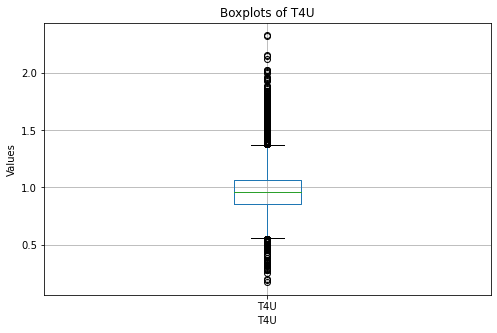

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


# Create boxplots for each column
plt.figure(figsize=(8,5))
df.boxplot("T4U")

# Add labels and title
plt.xlabel('T4U')
plt.ylabel('Values')
plt.title('Boxplots of T4U')

# Show the plot
plt.show()

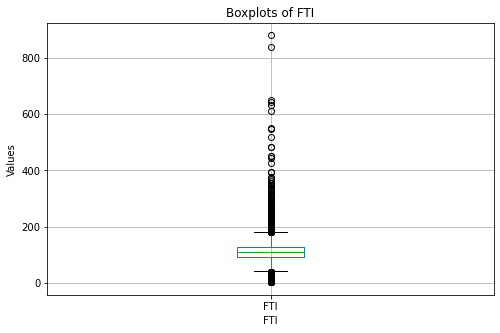

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


# Create boxplots for each column
plt.figure(figsize=(8,5))
df.boxplot("FTI")

# Add labels and title
plt.xlabel('FTI')
plt.ylabel('Values')
plt.title('Boxplots of FTI')

# Show the plot
plt.show()

REMOVING OUTLIER USING IQR

In [37]:
import pandas as pd

# Assuming 'df' is your DataFrame
columns_to_exclude = ['age']

for column in df.columns:
    # Check if the column is not in the exclusion list and has a float data type
    if column not in columns_to_exclude and df[column].dtype == float:
        # Calculate the IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



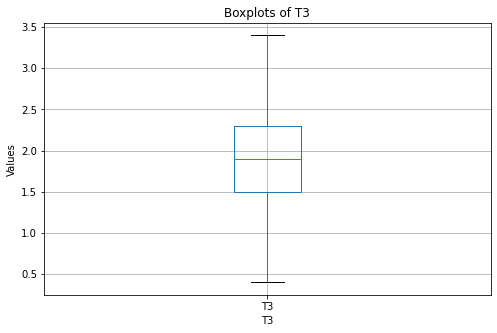

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Create boxplots for each column
plt.figure(figsize=(8,5))
df.boxplot("T3")

# Add labels and title
plt.xlabel('T3')
plt.ylabel('Values')
plt.title('Boxplots of T3')

# Show the plot
plt.show()


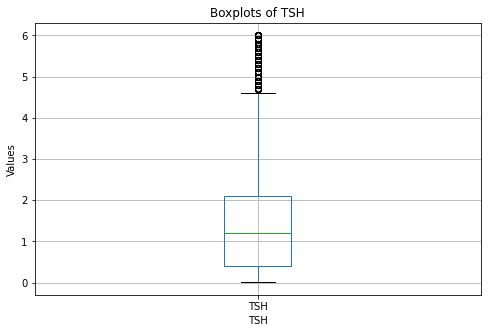

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# Create boxplots for each column
plt.figure(figsize=(8,5))
df.boxplot("TSH")

# Add labels and title
plt.xlabel('TSH')
plt.ylabel('Values')
plt.title('Boxplots of TSH')

# Show the plot
plt.show()

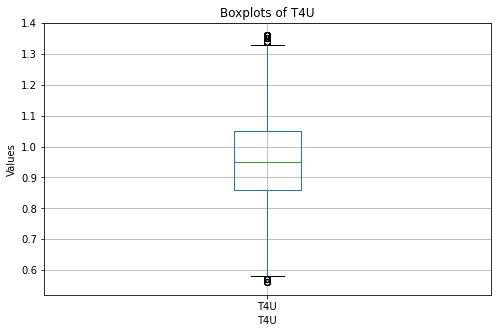

In [40]:
# Create boxplots for each column
plt.figure(figsize=(8,5))
df.boxplot("T4U")

# Add labels and title
plt.xlabel('T4U')
plt.ylabel('Values')
plt.title('Boxplots of T4U')

# Show the plot
plt.show()

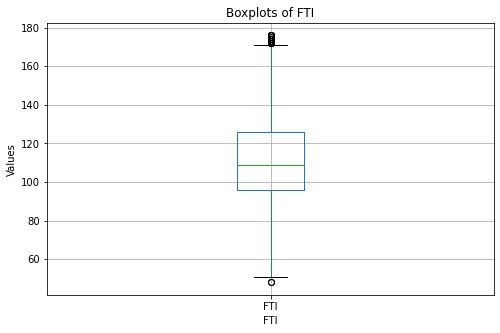

In [41]:
# Create boxplots for each column
plt.figure(figsize=(8,5))
df.boxplot("FTI")

# Add labels and title
plt.xlabel('FTI')
plt.ylabel('Values')
plt.title('Boxplots of FTI')

# Show the plot
plt.show()

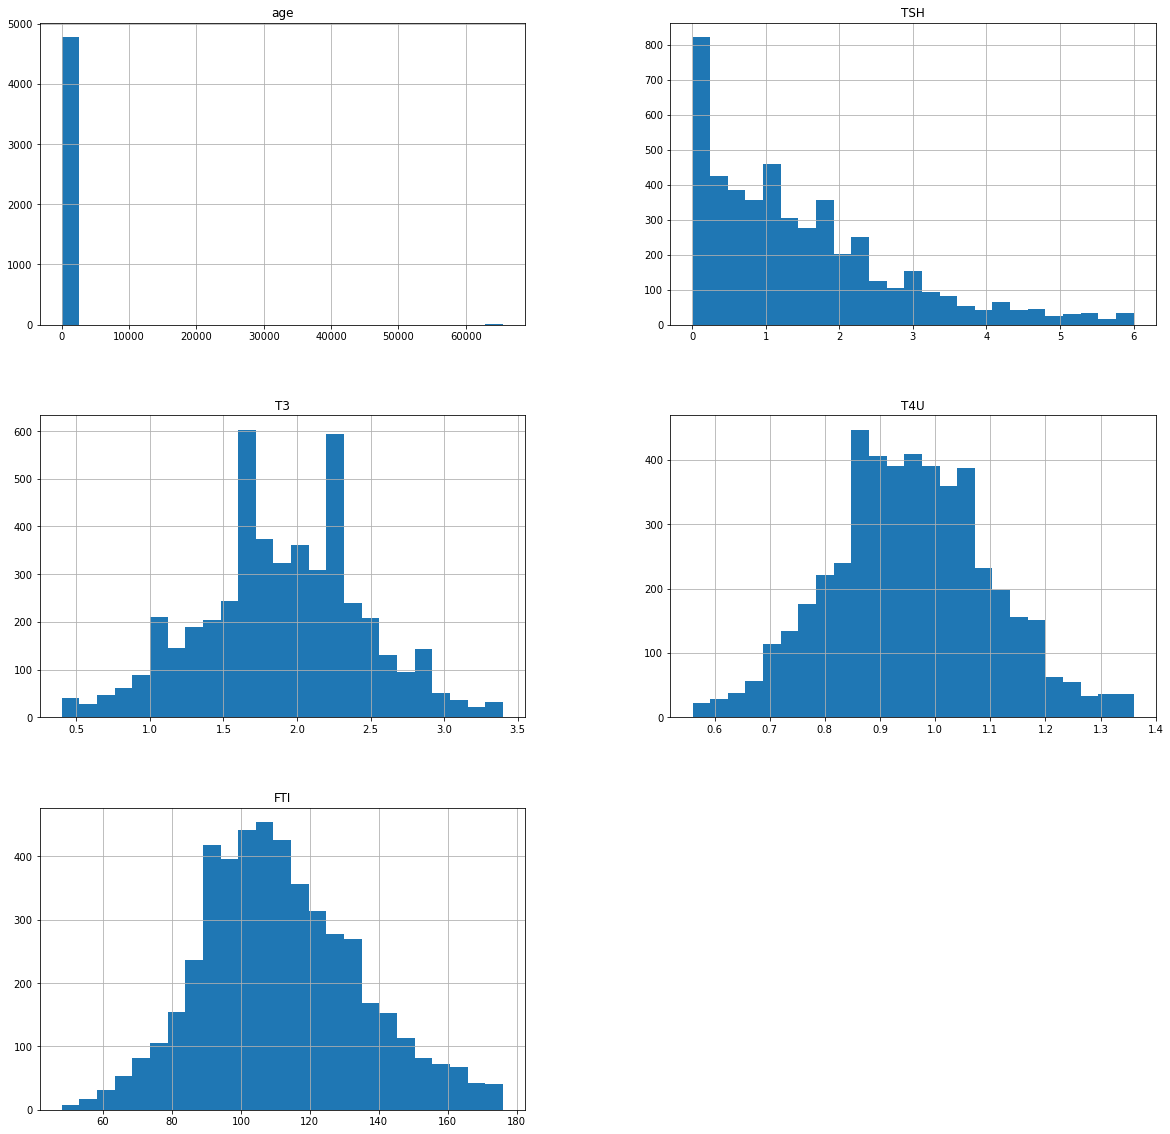

In [42]:
df.hist(bins=25,figsize=(20,20));

In [43]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI,target
18,36,F,f,f,f,f,f,f,f,t,...,f,f,f,f,f,1.50,2.4,1.06,85.0,Z
20,40,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,1.20,2.3,1.08,96.0,Z
21,40,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,5.90,2.1,0.84,105.0,Z
22,77,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.05,2.4,1.13,95.0,Z
26,51,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.05,2.1,0.87,106.0,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,42,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.89,2.1,1.04,110.0,Z
9128,65,M,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.73,1.8,0.90,94.0,Z
9129,65,F,t,f,f,f,f,f,t,t,...,f,f,f,f,f,4.10,2.1,1.19,113.0,Z
9136,42,F,t,f,f,f,f,f,f,t,...,f,f,f,f,f,2.30,1.3,0.73,81.0,Z


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 18 to 9140
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4779 non-null   int64  
 1   sex                        4643 non-null   object 
 2   on_thyroxine               4779 non-null   object 
 3   query_on_thyroxine         4779 non-null   object 
 4   on_antithyroid_medication  4779 non-null   object 
 5   sick                       4779 non-null   object 
 6   pregnant                   4779 non-null   object 
 7   thyroid_surgery            4779 non-null   object 
 8   I131_treatment             4779 non-null   object 
 9   query_hypothyroid          4779 non-null   object 
 10  query_hyperthyroid         4779 non-null   object 
 11  lithium                    4779 non-null   object 
 12  goitre                     4779 non-null   object 
 13  tumor                      4779 non-null   obje

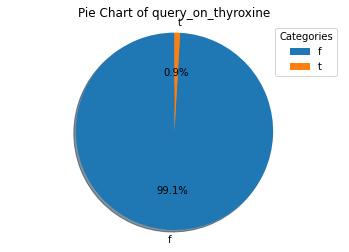

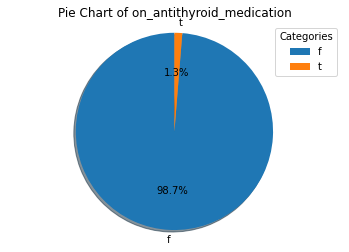

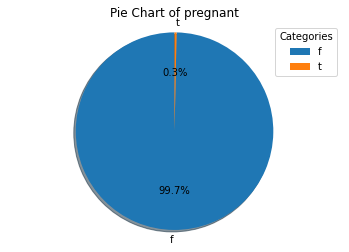

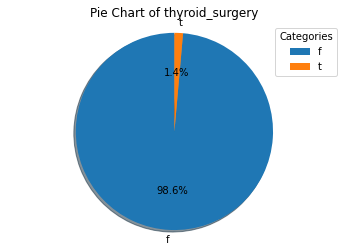

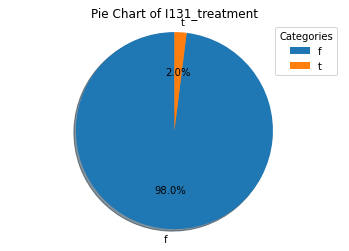

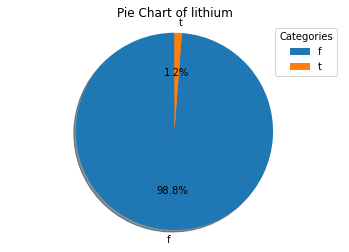

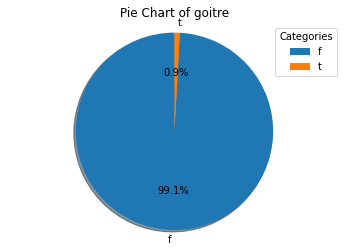

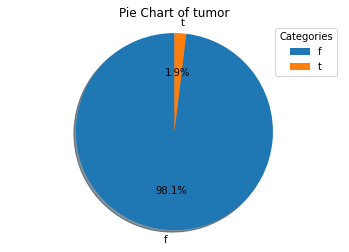

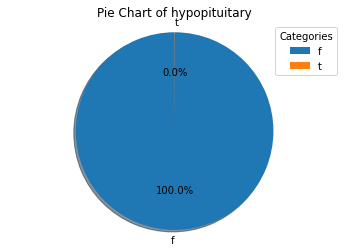

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
columns_to_exclude = ['TSH', 'T3','T4U','FTI','target','age','sex','on_thyroxine','query_hyperthyroid','query_hypothyroid','psych','sick']

# Iterate over each column
for column in df.columns:
    if column not in columns_to_exclude:
        # Calculate the column sums
        column_sums = df[column].value_counts()

        # Create a pie chart
        plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=90, shadow=True)

        # Add a title
        plt.title(f'Pie Chart of {column}')

        # Add legend
        plt.legend(title='Categories')

        # Set aspect ratio to be equal for a circular pie chart
        plt.axis('equal')

        # Display the chart
        plt.show()


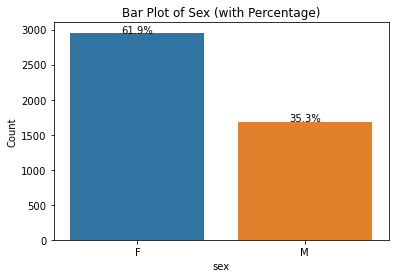

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Count the frequency of each category
sex_counts = df['sex'].value_counts()

# Calculate the percentage of each category
sex_percentages = sex_counts / len(df) * 100

# Create the bar plot using Seaborn
ax = sns.barplot(x=sex_counts.index, y=sex_counts.values)

# Annotate the percentage values on the bars
for i, v in enumerate(sex_counts.values):
    ax.text(i, v + 0.5, f'{sex_percentages[i]:.1f}%', ha='center')

# Customize the plot
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Bar Plot of Sex (with Percentage)')

# Show the plot
plt.show()


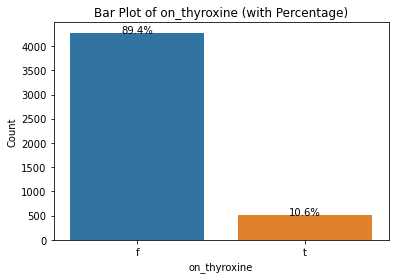

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Count the frequency of each category
sex_counts = df['on_thyroxine'].value_counts()

# Calculate the percentage of each category
sex_percentages = sex_counts / len(df) * 100

# Create the bar plot using Seaborn
ax = sns.barplot(x=sex_counts.index, y=sex_counts.values)

# Annotate the percentage values on the bars
for i, v in enumerate(sex_counts.values):
    ax.text(i, v + 0.5, f'{sex_percentages[i]:.1f}%', ha='center')

# Customize the plot
plt.xlabel('on_thyroxine')
plt.ylabel('Count')
plt.title('Bar Plot of on_thyroxine (with Percentage)')

# Show the plot
plt.show()


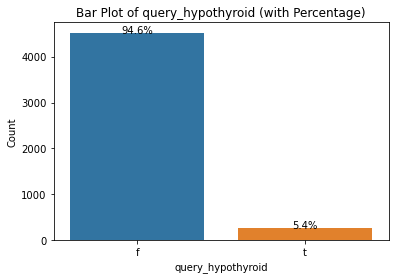

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Count the frequency of each category
sex_counts = df['query_hypothyroid'].value_counts()

# Calculate the percentage of each category
sex_percentages = sex_counts / len(df) * 100

# Create the bar plot using Seaborn
ax = sns.barplot(x=sex_counts.index, y=sex_counts.values)

# Annotate the percentage values on the bars
for i, v in enumerate(sex_counts.values):
    ax.text(i, v + 0.5, f'{sex_percentages[i]:.1f}%', ha='center')

# Customize the plot
plt.xlabel('query_hypothyroid')
plt.ylabel('Count')
plt.title('Bar Plot of query_hypothyroid (with Percentage)')

# Show the plot
plt.show()


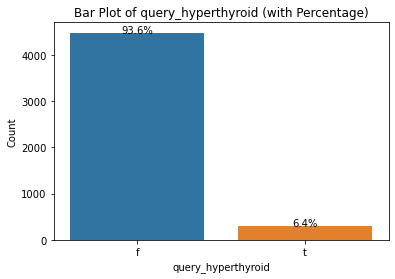

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Count the frequency of each category
sex_counts = df['query_hyperthyroid'].value_counts()

# Calculate the percentage of each category
sex_percentages = sex_counts / len(df) * 100

# Create the bar plot using Seaborn
ax = sns.barplot(x=sex_counts.index, y=sex_counts.values)

# Annotate the percentage values on the bars
for i, v in enumerate(sex_counts.values):
    ax.text(i, v + 0.5, f'{sex_percentages[i]:.1f}%', ha='center')

# Customize the plot
plt.xlabel('query_hyperthyroid')
plt.ylabel('Count')
plt.title('Bar Plot of query_hyperthyroid (with Percentage)')

# Show the plot
plt.show()


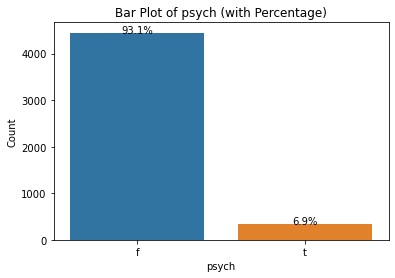

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Count the frequency of each category
sex_counts = df['psych'].value_counts()

# Calculate the percentage of each category
sex_percentages = sex_counts / len(df) * 100

# Create the bar plot using Seaborn
ax = sns.barplot(x=sex_counts.index, y=sex_counts.values)

# Annotate the percentage values on the bars
for i, v in enumerate(sex_counts.values):
    ax.text(i, v + 0.5, f'{sex_percentages[i]:.1f}%', ha='center')

# Customize the plot
plt.xlabel('psych')
plt.ylabel('Count')
plt.title('Bar Plot of psych (with Percentage)')

# Show the plot
plt.show()


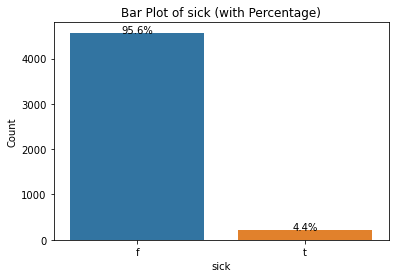

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Count the frequency of each category
sex_counts = df['sick'].value_counts()

# Calculate the percentage of each category
sex_percentages = sex_counts / len(df) * 100

# Create the bar plot using Seaborn
ax = sns.barplot(x=sex_counts.index, y=sex_counts.values)

# Annotate the percentage values on the bars
for i, v in enumerate(sex_counts.values):
    ax.text(i, v + 0.5, f'{sex_percentages[i]:.1f}%', ha='center')

# Customize the plot
plt.xlabel('sick')
plt.ylabel('Count')
plt.title('Bar Plot of sick (with Percentage)')

# Show the plot
plt.show()


In [52]:
df


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI,target
18,36,F,f,f,f,f,f,f,f,t,...,f,f,f,f,f,1.50,2.4,1.06,85.0,Z
20,40,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,1.20,2.3,1.08,96.0,Z
21,40,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,5.90,2.1,0.84,105.0,Z
22,77,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.05,2.4,1.13,95.0,Z
26,51,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.05,2.1,0.87,106.0,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,42,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.89,2.1,1.04,110.0,Z
9128,65,M,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.73,1.8,0.90,94.0,Z
9129,65,F,t,f,f,f,f,f,t,t,...,f,f,f,f,f,4.10,2.1,1.19,113.0,Z
9136,42,F,t,f,f,f,f,f,f,t,...,f,f,f,f,f,2.30,1.3,0.73,81.0,Z


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 18 to 9140
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4779 non-null   int64  
 1   sex                        4643 non-null   object 
 2   on_thyroxine               4779 non-null   object 
 3   query_on_thyroxine         4779 non-null   object 
 4   on_antithyroid_medication  4779 non-null   object 
 5   sick                       4779 non-null   object 
 6   pregnant                   4779 non-null   object 
 7   thyroid_surgery            4779 non-null   object 
 8   I131_treatment             4779 non-null   object 
 9   query_hypothyroid          4779 non-null   object 
 10  query_hyperthyroid         4779 non-null   object 
 11  lithium                    4779 non-null   object 
 12  goitre                     4779 non-null   object 
 13  tumor                      4779 non-null   obje

##### Save this New csv file as thyroid.csv

In [194]:
df.to_csv("thyroid.csv",index=None)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4779 entries, 18 to 9140
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4779 non-null   int64  
 1   sex                        4643 non-null   float64
 2   on_thyroxine               4779 non-null   object 
 3   query_on_thyroxine         4779 non-null   object 
 4   on_antithyroid_medication  4779 non-null   object 
 5   sick                       4779 non-null   object 
 6   pregnant                   4779 non-null   object 
 7   thyroid_surgery            4779 non-null   object 
 8   I131_treatment             4779 non-null   object 
 9   query_hypothyroid          4779 non-null   object 
 10  query_hyperthyroid         4779 non-null   object 
 11  lithium                    4779 non-null   object 
 12  goitre                     4779 non-null   object 
 13  tumor                      4779 non-null   obje

model training

With PCA

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Here 'df' is our DataFrame and 'target' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=8)  # Set the number of principal components to retain
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_pca, y_train)

# Make predictions on the training and testing data
y_train_pred = logreg.predict(X_train_pca)
y_test_pred = logreg.predict(X_test_pca)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.775568924928067
Testing Accuracy: 0.7761506276150628


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=9)  # Set the number of principal components to retain
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create an SVM classifier
svm = SVC()

# Fit the model on the training data
svm.fit(X_train_pca, y_train)

# Make predictions on the training and testing data
y_train_pred = svm.predict(X_train_pca)
y_test_pred = svm.predict(X_test_pca)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8608422704682187
Testing Accuracy: 0.8702928870292888


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=14)  # Set the number of principal components to retain
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_train_pca, y_train)

# Make predictions on the training and testing data
y_train_pred = dt.predict(X_train_pca)
y_test_pred = dt.predict(X_test_pca)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.944560669456067


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=9)  # Set the number of principal components to retain
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train_pca, y_train)

# Make predictions on the training and testing data
y_train_pred = rf.predict(X_train_pca)
y_test_pred = rf.predict(X_test_pca)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.9633891213389121


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=9)  # Set the number of principal components to retain
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create an XGBoost classifier
xgboost = xgb.XGBClassifier()

# Fit the model on the training data
xgboost.fit(X_train_pca, y_train)

# Make predictions on the training and testing data
y_train_pred = xgboost.predict(X_train_pca)
y_test_pred = xgboost.predict(X_test_pca)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9793356003138897
Testing Accuracy: 0.9560669456066946


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=9)  # Set the number of principal components to retain
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Fit the model on the training data
adaboost.fit(X_train_pca, y_train)

# Make predictions on the training and testing data
y_train_pred = adaboost.predict(X_train_pca)
y_test_pred = adaboost.predict(X_test_pca)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9217891708082657
Testing Accuracy: 0.9456066945606695


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=9)  # Set the number of principal components to retain
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train_pca, y_train)

# Make predictions on the training and testing data
y_train_pred = knn.predict(X_train_pca)
y_test_pred = knn.predict(X_test_pca)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8875228877844624
Testing Accuracy: 0.8598326359832636


without PCA
    

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# AHere 'df' is our DataFrame and 'target' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy for LogisticRegression:", train_accuracy)
print("Testing Accuracy for LogisticRegression:", test_accuracy)


Training Accuracy: 0.8590112477112215
Testing Accuracy: 0.8682008368200836


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm = SVC()

# Fit the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8608422704682187
Testing Accuracy: 0.8702928870292888


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.950836820083682


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.9644351464435147


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.983782369866597
Testing Accuracy: 0.9602510460251046


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Fit the model on the training data
adaboost.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9278053884383992
Testing Accuracy: 0.9497907949790795


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the column to predict

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8880460371436045
Testing Accuracy: 0.8577405857740585
